# Classification

- Logistic regression
- K-nearest neighbors
- decision tree classification
- gradient boosted machines

In [1]:
# we import the data
import pandas as pd

data_df = pd.read_csv("./data_classification.csv.zip", index_col=["id"])
data_df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0
19,0,5,1,4,0,0,0,0,0,1,...,4,2,0,9,0,1,0,1,1,1
20,0,2,1,3,1,0,0,1,0,0,...,3,0,0,10,0,1,0,0,1,0
22,0,5,1,4,0,0,1,0,0,0,...,7,1,3,6,1,0,1,0,1,0
26,0,5,1,3,1,0,0,0,1,0,...,4,2,1,5,0,1,0,0,0,1


In [2]:
data_df.shape

(595212, 58)

In [3]:
data_df["target"].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [4]:
data_df_0 = data_df.loc[data_df["target"] == 0].sample(data_df["target"].sum())
data_df_1 = data_df.loc[data_df["target"] == 1]

data_df_sub = pd.concat([data_df_0, data_df_1]).sample(frac=1.)
data_df_sub["target"].value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

## Data preparation

In [5]:
data_df_sub.dtypes.value_counts()

int64      48
float64    10
dtype: int64

In [6]:
data_df_sub.isnull().any()

target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [7]:
## We split the data into train and test

from sklearn.model_selection import train_test_split
y = data_df_sub["target"]
X =  data_df_sub.drop("target", 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.40,
                                                    random_state=42,
                                                    stratify = y)

In [8]:
print(y_test.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

1    0.5
0    0.5
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64


## Predictive modeling

In [9]:
# We use logistic regression
from sklearn.linear_model import LogisticRegression

In [10]:
# We fit and we predict

clf = LogisticRegression(n_jobs=-1, C=1e6)
clf.fit(X_train, y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [11]:
prediction = pd.DataFrame({"y": y_test, "prediction": clf.predict(X_test)})
(prediction["y"] == prediction["prediction"]).mean()

0.586367826688177

In [12]:
from sklearn import metrics
metrics.accuracy_score(prediction["y"], prediction["prediction"])

0.586367826688177

In [13]:
metrics.recall_score(prediction["y"], prediction["prediction"])

0.54690020742106471

In [73]:
## Lets try different classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression(n_jobs=-1)
tree_clf = DecisionTreeClassifier(min_samples_leaf=50)
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
gbm_clf = GradientBoostingClassifier()

In [74]:
lr_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
gbm_clf.fit(X_train, y_train)

pred_df = pd.DataFrame({"y": y_test,
                        "pred_LR": lr_clf.predict(X_test),
                        "pred_KNN": knn_clf.predict(X_test),
                        "pred_Tree": tree_clf.predict(X_test),
                        "pred_GBM": gbm_clf.predict(X_test)})

In [75]:
pred_df.apply(lambda x: metrics.accuracy_score(pred_df["y"], x)).sort_values(ascending=False)

y            1.000000
pred_GBM     0.592130
pred_LR      0.586425
pred_Tree    0.556177
pred_KNN     0.525640
dtype: float64

## Receiver operating characteristic curve

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])

pd.DataFrame({"fpr": fpr, "tpr": tpr, "thresholds": thresholds})

,fpr,thresholds,tpr
0,0.000000,0.935163,0.000115
1,0.000115,0.919014,0.000115
2,0.000115,0.904357,0.000346
3,0.000230,0.903464,0.000346
4,0.000230,0.887523,0.001037
5,0.000461,0.886045,0.001037
6,0.000461,0.879891,0.001613
7,0.000576,0.878435,0.001613
8,0.000576,0.877360,0.001729
9,0.000691,0.876641,0.001729


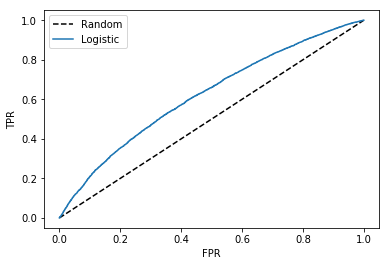

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, fpr, "k--", label="Random")
plt.plot(fpr, tpr, label="Logistic")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

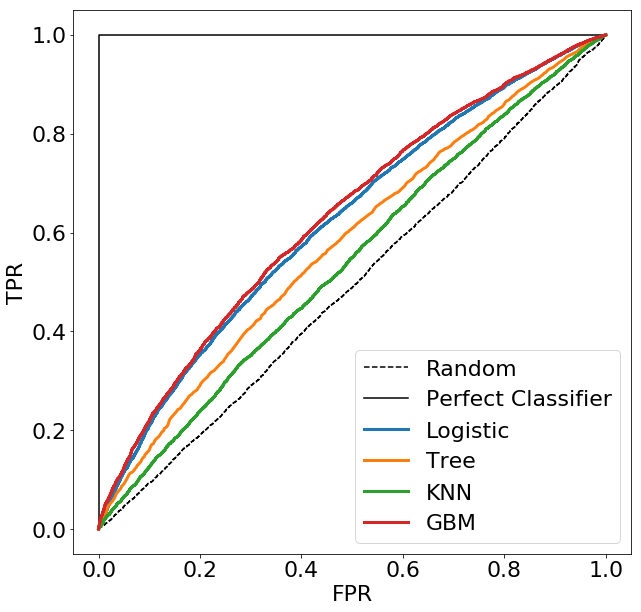

In [78]:
import numpy as np
def plot_ROC(clf, label):
    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=label, lw=3)

plt.figure(figsize=(10,10))
fpr, tpr, _ = metrics.roc_curve(y_test, np.random.randn(y_test.shape[0]))
plt.plot(fpr, tpr, "k--", label="Random")
fpr, tpr, _ = metrics.roc_curve(y_test, y_test + 1e-6*np.random.randn(y_test.shape[0]))
plt.plot(fpr, tpr, "k-", label="Perfect Classifier")
plot_ROC(lr_clf, "Logistic")
plot_ROC(tree_clf, "Tree")
plot_ROC(knn_clf, "KNN")
plot_ROC(gbm_clf, "GBM")

plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

In [79]:
pred_df2 = pd.DataFrame({"y": y_test,
                        "pred_LR": lr_clf.predict_proba(X_test)[:,1],
                        "pred_KNN": knn_clf.predict_proba(X_test)[:,1],
                        "pred_Tree": tree_clf.predict_proba(X_test)[:,1],
                        "pred_GBM": gbm_clf.predict_proba(X_test)[:,1]})
pred_df2

,pred_GBM,pred_KNN,pred_LR,pred_Tree,y
id,,,,,
797213,0.354900,0.204000,0.356311,0.222222,0
1267096,0.413369,0.395125,0.443219,0.387097,0
1378197,0.528737,0.496027,0.584442,0.281690,1
1360112,0.509950,0.197213,0.482625,0.724138,1
646771,0.504480,0.596637,0.520959,0.666667,0
428419,0.679036,0.499187,0.654550,0.730769,0
793700,0.486739,0.696521,0.568088,0.378378,0
839928,0.647180,0.799955,0.535888,0.606061,0
829252,0.513356,0.803379,0.522004,0.288889,1


In [80]:
pred_df2.apply(lambda x: metrics.roc_auc_score(pred_df2["y"], x)).sort_values(ascending=False)

y            1.000000
pred_GBM     0.631459
pred_LR      0.620804
pred_Tree    0.577311
pred_KNN     0.538755
dtype: float64

In [81]:
pred_df2.apply(lambda x: x.nunique())

pred_GBM     17354
pred_KNN     17275
pred_LR      17356
pred_Tree      329
y                2
dtype: int64

## Lift charts

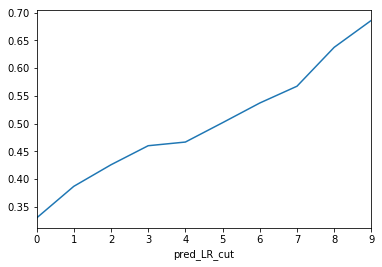

In [82]:
temp = pred_df2.copy()
temp["pred_LR_cut"] = pd.qcut(temp["pred_LR"], 10, labels=False)
temp.groupby("pred_LR_cut")["y"].mean().plot()

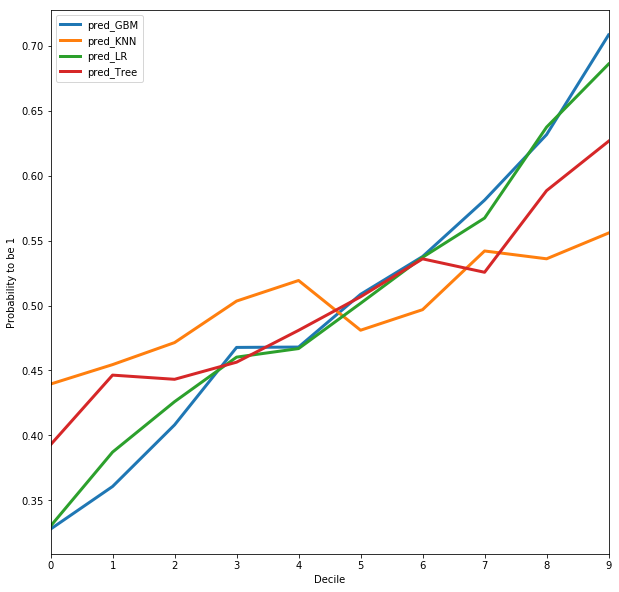

In [83]:
def plot_deciles(col):
    temp = pred_df2.copy()
    temp["Decile"] = pd.qcut(temp[col], 10, labels=False, duplicates="drop")
    temp.groupby("Decile")["y"].mean().plot(label=col, lw=3)

plt.figure(figsize=(10,10))
pred_df2.drop("y", 1).columns.map(plot_deciles) 
plt.ylabel("Probability to be 1")
plt.legend()

## Optimize the model complexity

In [28]:
## let adjust the regulation parameter in Logistic Regression

lr_clf = LogisticRegression(penalty='l2')

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_auc = pd.DataFrame(index=Cs, columns=["AUC_test", "AUC_train"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict_proba(X_train)[:,1]
    y_estimated_test = lr_clf.predict_proba(X_test)[:,1]
    auc_train = metrics.roc_auc_score(y_train, y_estimated_train)
    auc_test = metrics.roc_auc_score(y_test, y_estimated_test)
    df_auc.loc[c, :] = [auc_test, auc_train] 

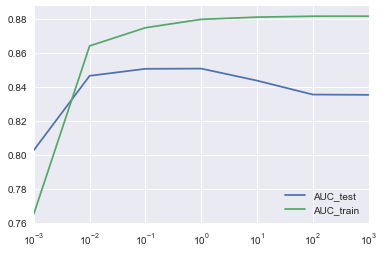

In [29]:
df_auc.plot(logx=True)

In [35]:
lr_clf = LogisticRegression(penalty='l2')

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

df_mse = pd.DataFrame(index=Cs, columns=["MSE_test", "MSE_train"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(X_train, y_train)
    y_estimated_train = lr_clf.predict(X_train)
    y_estimated_test = lr_clf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_estimated_train)
    mse_test = metrics.mean_squared_error(y_test, y_estimated_test)
    df_mse.loc[c, :] = [mse_test, mse_train] 

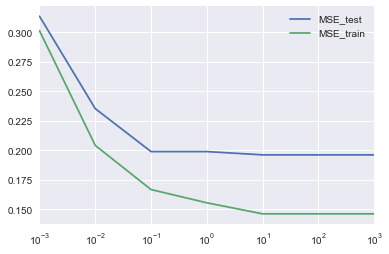

In [36]:
df_mse.plot(logx=True)

## K-fold crossvalidation

In [59]:
from sklearn.linear_model import LogisticRegressionCV

lrcv_clf = LogisticRegressionCV(scoring="roc_auc", cv=10, Cs=200)

lrcv_clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=200, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
           verbose=0)

In [61]:
df_auccv = pd.DataFrame(lrcv_clf.scores_[1], columns=lrcv_clf.Cs_).transpose()
df_auccv

,0,1,2,3,4,5,6,7,8,9
0.000100,0.722689,0.786765,0.713235,0.568182,0.618182,0.734848,0.684848,0.606061,0.736364,0.746970
0.000110,0.719888,0.786765,0.713235,0.568182,0.618182,0.734848,0.684848,0.613636,0.739394,0.746970
0.000120,0.719888,0.788235,0.714706,0.568182,0.622727,0.736364,0.684848,0.615152,0.733333,0.748485
0.000132,0.718487,0.789706,0.716176,0.569697,0.622727,0.734848,0.686364,0.615152,0.733333,0.748485
0.000145,0.719888,0.795588,0.716176,0.574242,0.627273,0.734848,0.686364,0.618182,0.730303,0.748485
0.000159,0.721289,0.798529,0.717647,0.574242,0.631818,0.736364,0.687879,0.618182,0.730303,0.751515
0.000174,0.722689,0.802941,0.717647,0.577273,0.633333,0.736364,0.687879,0.622727,0.730303,0.753030
0.000191,0.722689,0.805882,0.719118,0.578788,0.636364,0.736364,0.692424,0.622727,0.730303,0.753030
0.000210,0.725490,0.810294,0.720588,0.580303,0.637879,0.737879,0.690909,0.619697,0.731818,0.751515
0.000230,0.724090,0.813235,0.722059,0.586364,0.639394,0.739394,0.687879,0.622727,0.733333,0.753030


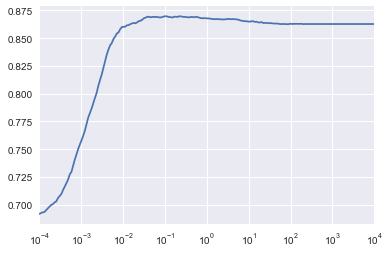

In [62]:
df_auccv.mean(1).plot(logx=True)

In [63]:
lrcv_clf.C_

array([ 0.10353218])

In [64]:
df_auccv.mean(1).argmax()

0.10353218432956626

In [65]:
y_estimated_test = lrcv_clf.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_estimated_test)

0.85871421066456533

## Other functions to tune models

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier()

In [73]:
## grid search

param_grid = {
    "n_neighbors": range(1,11),
    "weights": ['uniform', 'distance'],
    "p": [1,2,3,4],   
}

grid = GridSearchCV(knn_clf, param_grid=param_grid, scoring="roc_auc", n_jobs=-1, cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [74]:
grid.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [75]:
grid.best_score_

0.81373019926390699

In [76]:
grid.cv_results_

{'mean_fit_time': array([ 0.00444579,  0.0020474 ,  0.00223565,  0.00241842,  0.0024538 ,
         0.00233934,  0.0023092 ,  0.0022676 ,  0.00237451,  0.00236533,
         0.00217791,  0.00218029,  0.002248  ,  0.00248537,  0.00240657,
         0.00212691,  0.00212429,  0.00206468,  0.00243528,  0.00205104,
         0.00258498,  0.00222106,  0.00231769,  0.00228331,  0.00201948,
         0.00209911,  0.00209887,  0.0021585 ,  0.00270019,  0.00304689,
         0.00278573,  0.00311551,  0.00244901,  0.00249393,  0.00206728,
         0.00263867,  0.00288043,  0.00339282,  0.0024925 ,  0.00217991,
         0.00357728,  0.00219941,  0.00235829,  0.00294962,  0.00249586,
         0.0025619 ,  0.00255537,  0.00213273,  0.0021446 ,  0.0023742 ,
         0.00238218,  0.00225525,  0.00219169,  0.00205112,  0.0022294 ,
         0.00258904,  0.00216875,  0.00212424,  0.00193782,  0.00198767,
         0.00214305,  0.00247684,  0.00267048,  0.00265238,  0.00261078,
         0.00207083,  0.0021503 , 

In [78]:
y_estimated_test = grid.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_estimated_test)

0.81584909377462567

In [95]:
## randomSearch

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_distributions = {
    "learning_rate": uniform(0.0001, 0.5),
    "n_estimators": sp_randint(2, 100),
    "max_depth": sp_randint(2, 30),
    "min_samples_split": uniform(0, 1),
    "min_samples_leaf": uniform(0, 0.5),
    "min_weight_fraction_leaf": uniform(0, 0.5),
    "subsample":uniform(0, 1),
    "max_leaf_nodes": sp_randint(4, 1000)    
}

gbm_clf = GradientBoostingClassifier()

r_grid = RandomizedSearchCV(gbm_clf, 
                            param_distributions=param_distributions,
                            cv=10,
                            n_jobs=-1,
                            n_iter=2000,
                            verbose=1)

r_grid.fit(X_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 11952 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 19152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=2000, n_jobs=-1,
          param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120cc17b8>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120cc1828>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120cc1f98>, 'min_samples_split': <scip...0x120c259e8>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11fb045c0>},
          pre_dispatch='2*n

In [96]:
r_grid.best_params_

{'learning_rate': 0.43316343010712249,
 'max_depth': 28,
 'max_leaf_nodes': 453,
 'min_samples_leaf': 0.091592198191151386,
 'min_samples_split': 0.39999906143878716,
 'min_weight_fraction_leaf': 0.11743921761825776,
 'n_estimators': 93,
 'subsample': 0.6855802659612612}

In [97]:
r_grid.best_score_

0.848314606741573

In [98]:
y_estimated_test = r_grid.predict_proba(X_test)[:,1]

In [99]:
metrics.roc_auc_score(y_test, y_estimated_test)

0.84801024428684002

In [17]:
import pandas as pd

df = pd.read_csv("./data_classification.csv.zip")

In [18]:
import numpy as np 
df = df.to_sparse(fill_value=0)

In [19]:
df.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null 